___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# K Means Color Quantization

### Imports


In [1]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [4]:
image_as_array = mpimg.imread('Screenshot 2024-05-25 at 14.18.16.png')

In [5]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[0.43137255, 0.60784316, 0.92156863, 1.        ],
        [0.43137255, 0.6       , 0.92156863, 1.        ],
        [0.43137255, 0.6       , 0.92156863, 1.        ],
        ...,
        [0.27450982, 0.45882353, 0.8862745 , 1.        ],
        [0.28235295, 0.46666667, 0.8901961 , 1.        ],
        [0.28235295, 0.46666667, 0.8901961 , 1.        ]],

       [[0.43137255, 0.60784316, 0.92156863, 1.        ],
        [0.43137255, 0.6       , 0.92156863, 1.        ],
        [0.43137255, 0.6       , 0.92156863, 1.        ],
        ...,
        [0.27450982, 0.45882353, 0.8862745 , 1.        ],
        [0.28235295, 0.46666667, 0.8901961 , 1.        ],
        [0.28235295, 0.46666667, 0.8901961 , 1.        ]],

       [[0.43137255, 0.60784316, 0.92156863, 1.        ],
        [0.43137255, 0.6       , 0.92156863, 1.        ],
        [0.43137255, 0.6       , 0.92156863, 1.        ],
        ...,
        [0.27450982, 0.45882353, 0.8862745 , 1.        ],
        [0.28235295, 0.466666

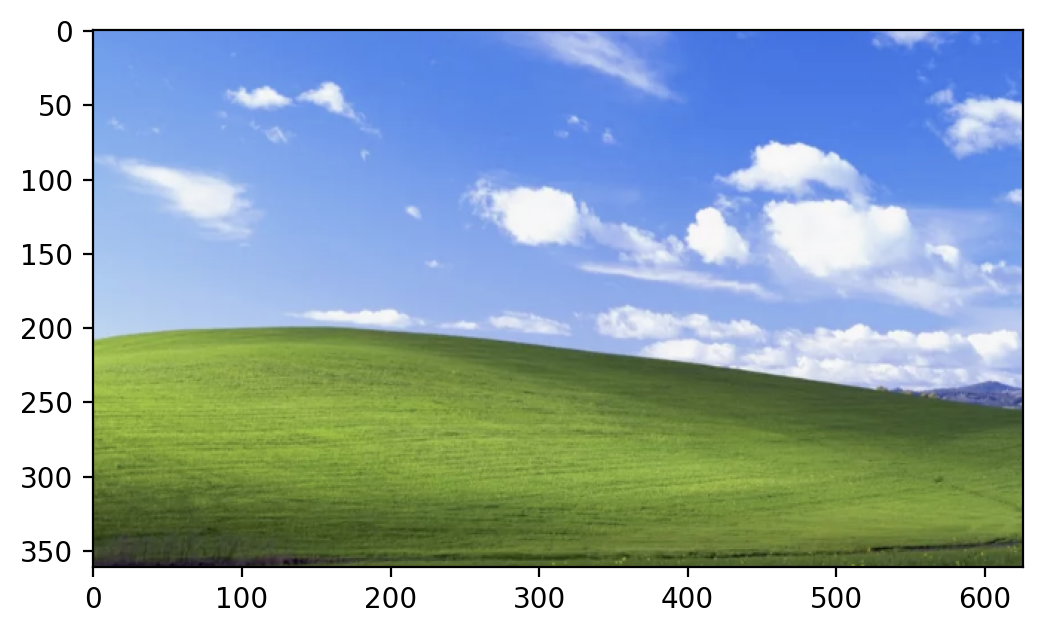

In [6]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [7]:
image_as_array.shape
# (h,w,3 color channels)

(361, 626, 4)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [8]:
(h,w,c) = image_as_array.shape

In [9]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [10]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=3)

In [12]:
model

KMeans(n_clusters=6)

In [13]:
labels = model.fit_predict(image_as_array2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
labels

array([5, 5, 5, ..., 0, 0, 0], dtype=int32)

In [15]:
# THESE ARE THE 6 RGB COLOR CODES!
model.cluster_centers_

array([[0.31611773, 0.39108562, 0.19217643, 1.        ],
       [0.67506504, 0.76063406, 0.93006885, 1.        ],
       [0.3506467 , 0.527326  , 0.8999342 , 1.        ],
       [0.8915428 , 0.9160726 , 0.96053475, 1.        ],
       [0.511089  , 0.61633706, 0.26473737, 1.        ],
       [0.5230555 , 0.6573472 , 0.9191518 , 1.        ]], dtype=float32)

In [16]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [17]:
rgb_codes

array([[0, 0, 0, 1],
       [1, 1, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 0, 1],
       [1, 1, 1, 1]])

In [18]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [19]:
quantized_image

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        ...,
        [0, 1, 1, 1],
        [0, 1, 1, 1],
        [0, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        ...,
        [0, 1, 1, 1],
        [0, 1, 1, 1],
        [0, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        ...,
        [0, 1, 1, 1],
        [0, 1, 1, 1],
        [0, 1, 1, 1]],

       ...,

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]]])

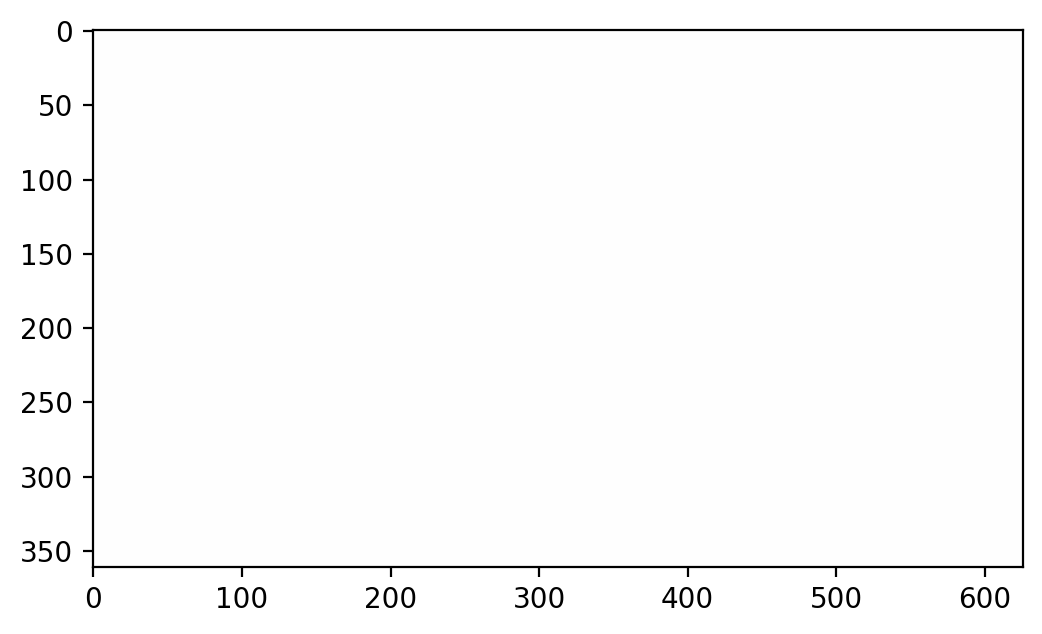

In [20]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)